<center> <h1>Module 8 - PCA and PCR with a Continuous Response</h1> </center>
<center> <h2>Class Coding Analysis</h2> </center>

In [1]:
# load packages here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

**This is the same data set used in the Module 8 Course Notes. You can check your code output against the output from the course notes to verify you are getting the correct results.**

Environmental impact studies seek to identify and quantify the affect of environmental conditions on human and ecological health. For example, extreme heat poses a threat to public health by creating conditions conducive to hyperthermia. Likewise, extreme cold poses a threat to public health via conditions suitable to hypothermia. Extreme weather events (tornados, typhoons, etc.) also pose an obvious threat to public health. A less understood environmental variable that, hypothetically, may also pose a threat to public health is the concentration of pollution (air quality).

In an effort to understand the impact of the environment on human health, the data set "EnvironmentalImpacts.txt" (found on Canvas) contains environmental and socio-economic information for 60 different cities in the U.S. The collected variables are given in the table below.

Variable       | Description
-------------- | -------------
AnnPrecip      | Average annual precipitation
MeanJanTemp    | Average January temperature (in degrees Fahrenheit)
MeanJulyTemp   | Average July temperature (in degrees Fahrenheit)
PctGT65        | Percent of population greater than 65 years old
PopPerHouse    | Population per household
School         | Median school years completed
PctSound       | Percent of housing units that are "sound"
PopPerSqMile   | Population per square mile
PctNonWhite    | Percent of population that is nonwhite
PctWhiteCollar | Percent of employment in white-collar jobs
PctU20000      | Percent of families with income under $20,000
Hydrocarbons   | Relative pollution potential of hydrocarbons
Nitrogen       | Relative pollution potential of oxides in nitrogen
SO2            | Relative pollution potential of oxides in sulfur dioxide
RelHumid       | Annual average relative humidity
AAMort         | Age-adjusted mortality

The goal of this analysis is to determine which, if any, of the above environmental and socioeconomic variables contributed to the mortality rate, with an emphasis of understanding the role of pollution.

Do the following:

1. Download the "EnvironmentalImpacts.txt" file from Canvas and put it in the same folder as this file.
2. Read in the data set, call it "env", and look at a summary of the data. **Remove the "row" column (which contains row numbers) from the data set.**
3. Make sure the class of "env" is a *Pandas dataframe*.

In [33]:
env = pd.read_table("EnvironmentalImpacts.txt", delimiter = ' ')
env.drop('row', axis = 1, inplace = True)
env.describe()

,AnnPrecip,MeanJanTemp,MeanJulyTemp,PctGT65,PopPerHouse,School,PctSound,PopPerSqMile,PctNonWhite,PctWhiteCollar,PctU20000,log.Hydro,log.Nit,log.SO2,RelHumid,AAMort
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,37.366667,33.983333,74.583333,8.798333,3.263167,11.973333,80.913333,3876.050000,11.870000,46.081667,14.373333,2.753290,2.323627,3.197213,57.666667,940.358500
std,9.984678,10.168899,4.763177,1.464552,0.135252,0.845299,5.141373,1454.102361,8.921148,4.613043,4.160096,1.175853,1.184413,1.497608,5.369931,62.206685
min,10.000000,12.000000,63.000000,5.600000,2.920000,10.000000,66.800000,1441.000000,0.800000,33.800000,9.400000,0.000000,0.000000,0.000000,38.000000,790.730000
25%,32.750000,27.000000,72.000000,7.675000,3.210000,11.400000,78.375000,3104.250000,4.950000,43.250000,12.000000,1.945910,1.386294,2.397895,55.000000,898.370000
50%,38.000000,31.500000,74.000000,9.000000,3.265000,12.050000,81.150000,3567.000000,10.400000,45.500000,13.200000,2.673554,2.197225,3.398970,57.000000,943.685000
75%,43.250000,40.000000,77.250000,9.700000,3.360000,12.500000,83.600000,4519.750000,15.650000,49.525000,15.150000,3.409395,3.166145,4.233797,60.000000,983.205000
max,60.000000,67.000000,85.000000,11.800000,3.530000,13.300000,90.700000,9699.000000,38.500000,59.700000,26.400000,6.473891,5.765191,5.627621,73.000000,1113.160000


In [34]:
env.shape  # ideally want at least 15*6 = 90 observations, but we have only 60
# (60 observations can support no more than 10 variables)

(60, 16)

## Use Linear Regression for Comparison Models

### Regression Model 1
Using all predictors (this model suffers from multicollinearity and is likely unstable due to too few observations per predictor)

In [35]:
y = env[['AAMort']]
X_full = sm.add_constant(env.drop('AAMort', axis = 1))
mod1 = sm.OLS(y, X_full)
res1 = mod1.fit()
# print(res1.summary())
# This model is not good, so we would normally never even look at these values, but
# we will refer back to this number as an illustration once we look at PCR
print(res1.rsquared_adj)  # 73%
print(res1.bic)  # 635
print(res1.aic)  # 601
print(res1.mse_resid)  # 1051

                            OLS Regression Results                            
Dep. Variable:                 AAMort   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     11.55
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.07e-10
Time:                        11:00:36   Log-Likelihood:                -284.56
No. Observations:                  60   AIC:                             601.1
Df Residuals:                      44   BIC:                             634.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2089.5002    437.227      4.

### Regression Model 2
Using a subset of predictors we chose in Module 5 (this model meets assumptions, with some potential influential points)

In [37]:
X_subset = sm.add_constant(env[['AnnPrecip', 'MeanJanTemp', 'School', 'PctNonWhite', 'log.Nit']])
mod2 = sm.OLS(y, X_subset)
res2 = mod2.fit()
# print(res2.summary())
# We will use this as our comparison data to see if PCR can beat this model
print(res2.rsquared_adj)  # 72% (higher better)
print(res2.bic)  # 608 (lower better)
print(res2.aic)  # 595 (lower better)
print(res2.mse_resid)  # 1081 (lower better)

0.7205612129244097
607.6742359478096
595.1081685744771
1081.336359905843


## PCA

In [6]:
X = env.drop('AAMort', axis = 1)
X.head()

,AnnPrecip,MeanJanTemp,MeanJulyTemp,PctGT65,PopPerHouse,School,PctSound,PopPerSqMile,PctNonWhite,PctWhiteCollar,PctU20000,log.Hydro,log.Nit,log.SO2,RelHumid
0,36,27,71,8.1,3.34,12.4,81.5,3243,8.8,42.6,11.7,3.044522,2.708050,4.077537,59
1,35,23,72,11.1,3.14,12.0,78.8,4281,3.5,50.7,14.4,2.079442,2.302585,3.663562,57
2,44,29,74,10.4,3.21,10.8,81.6,4260,0.8,39.4,12.4,1.791759,1.791759,3.496508,54
3,47,45,79,6.5,3.41,12.1,77.5,3125,27.1,50.2,20.6,2.890372,2.079442,3.178054,56
4,43,35,77,7.6,3.44,10.6,84.6,6441,24.4,43.7,14.3,3.761200,3.637586,5.327876,55


In [38]:
# Standardize predictors (Xs)
variable_names = X.columns
scaler = StandardScaler().fit(X[variable_names])
X[variable_names] = scaler.transform(X[variable_names])
# X

,AnnPrecip,MeanJanTemp,MeanJulyTemp,PctGT65,PopPerHouse,School,PctSound,PopPerSqMile,PctNonWhite,PctWhiteCollar,PctU20000,log.Hydro,log.Nit,log.SO2,RelHumid
0,-0.138031,-0.692530,-0.758648,-0.480848,0.572868,0.509012,0.115070,-0.439028,-0.347030,-0.761113,-0.648036,0.249768,0.327308,0.592781,0.250392
1,-0.239030,-1.089206,-0.546932,1.584847,-0.918328,0.031813,-0.414513,0.280838,-0.946138,1.009595,0.006464,-0.577908,-0.017915,0.314024,-0.125196
2,0.669958,-0.494192,-0.123501,1.102851,-0.396410,-1.399782,0.134684,0.266274,-1.251343,-1.460653,-0.478351,-0.824630,-0.452845,0.201535,-0.688577
3,0.972954,1.092511,0.935077,-1.582552,1.094787,0.151113,-0.669498,-0.520863,1.721586,0.900292,1.509392,0.117565,-0.207905,-0.012901,-0.312989
4,0.568959,0.100822,0.511646,-0.825130,1.318466,-1.638381,0.723110,1.778826,1.416381,-0.520647,-0.017777,0.864407,1.118738,1.434717,-0.500783
5,1.578946,1.092511,1.146793,-0.756274,1.393026,-0.922584,-2.768217,-0.382160,3.010233,-0.651810,2.697189,0.555661,0.972420,0.726867,-0.688577
6,0.568959,-0.395023,-0.123501,1.447134,-0.247290,1.344109,0.585811,0.556856,-0.946138,0.681686,-0.744999,0.249768,0.972420,0.626178,-0.312989
7,0.770956,-0.395023,-0.335216,0.345430,0.200069,-0.445385,0.997709,-1.203973,-0.742667,-1.242047,-0.938926,-0.824630,-0.798068,-1.219412,-0.312989
8,-0.138031,-0.990037,-0.970363,0.138861,0.349189,-0.564685,0.448511,1.876612,-0.426158,-0.782974,-0.429870,0.117565,0.137318,0.278575,0.625979
9,-0.138031,-0.692530,-0.546932,0.483143,0.721988,-0.326086,-0.316442,0.233679,-0.584412,-1.110883,-0.284425,-0.230171,-0.321597,-0.135670,0.250392


In [8]:
# This is how you would standardize AnnPrecip "by hand"
# (env[['AnnPrecip']] - np.mean(env[['AnnPrecip']], axis = 0)) / np.std(env[['AnnPrecip']], ddof = 1)

In [39]:
# X.shape[1]

15

In [10]:
pca = PCA(n_components = X.shape[1]).fit(X)
pc_train = pca.transform(X)

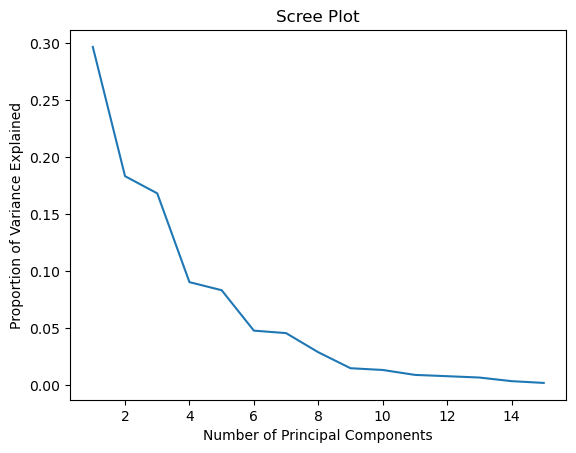

In [11]:
# Create Scree Plot
sns.lineplot(x = np.arange(1, X.shape[1] + 1), 
             y = pca.explained_variance_ratio_)
plt.xlabel("Number of Principal Components")
plt.ylabel("Proportion of Variance Explained")
plt.title("Scree Plot")
plt.show()

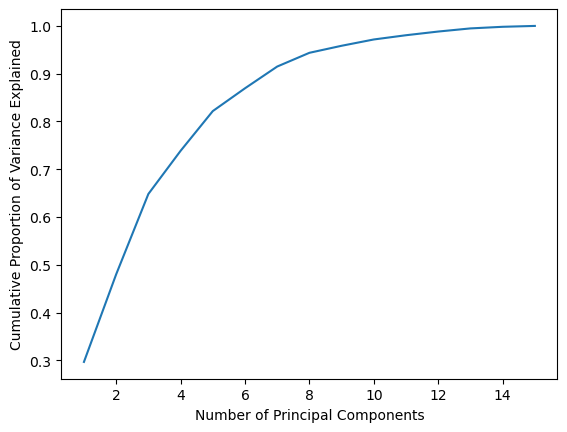

In [12]:
sns.lineplot(x = np.arange(1, X.shape[1] + 1),
             y = np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.show()

In [13]:
# 86.9% of the variability (of the predictors) explained with 6 principal components
print(np.cumsum(pca.explained_variance_ratio_)[:6][-1])  # -1 grabs the last value (total cummulative sum)
# 97.2% of the variability (of the predictors) explained with 6 principal components
print(np.cumsum(pca.explained_variance_ratio_)[:10][-1])

0.8694362204997584
0.971647651171688


## PCR

Start by using cross-validation to choose the number of principal components.

In [14]:
# Author: Wenhao Zhang <wenhaoz@ucla.edu>
# Website: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_refit_callable.html#sphx-glr-auto-examples-model-selection-plot-grid-search-refit-callable-py
# Code modified slightly by Dr. Z

# Calculate the lower bound within 1 standard deviation
# of the best `mean_test_scores`.
def lower_bound(cv_results):
    best_score_idx = np.argmin(-cv_results["mean_test_score"])  # find minimum position of (positive) MSEs
    return (
        -cv_results["mean_test_score"][best_score_idx]
        + (cv_results["std_test_score"][best_score_idx] / np.sqrt(5))  # 5-fold CV
    )

# Balance model complexity with cross-validated score.
def best_low_complexity(cv_results):
    threshold = lower_bound(cv_results)  # pass in (positive) MSEs
    candidate_idx = np.flatnonzero(-cv_results["mean_test_score"] <= threshold)
    best_idx = candidate_idx[
        cv_results["param_reduce_dim__n_components"][candidate_idx].argmin()
    ]
    return best_idx

pipe = Pipeline(
    [
        ("reduce_dim", PCA(random_state = 42)),
        ("linear_model", LinearRegression(fit_intercept = True)),
    ]
)

In [46]:
list(range(1, X.shape[1] + 1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [16]:
param_grid = {"reduce_dim__n_components": list(range(1, X.shape[1] + 1))}

# 5-fold cross validation to choose the number of components
grid = GridSearchCV(
    pipe,
    cv = 5,
    n_jobs = 1,
    param_grid = param_grid,
    scoring = "neg_mean_squared_error",  # can use "accuracy" for binary response
    refit = best_low_complexity, 
)

grid.fit(X, y)

n_components = grid.cv_results_["param_reduce_dim__n_components"]
test_scores = -grid.cv_results_["mean_test_score"]  # get positive MSE

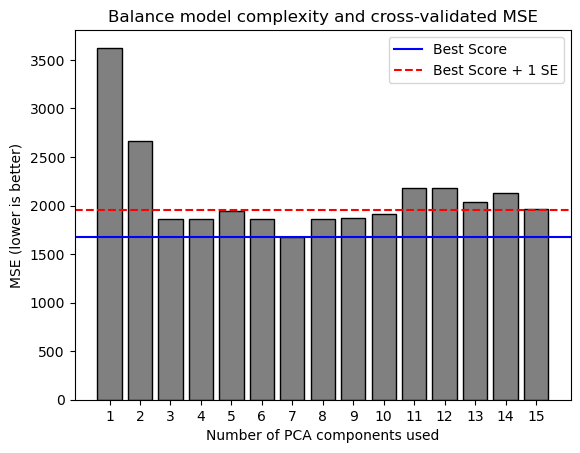

In [17]:
plt.figure()
plt.bar(n_components, 
        test_scores, 
        color = "grey",
        edgecolor = 'black')

lower = lower_bound(grid.cv_results_)
plt.axhline(np.min(test_scores), 
            linestyle = "-", 
            color = "blue", 
            label = "Best Score")
plt.axhline(lower, 
            linestyle = "--",
            color = "red", 
            label = "Best Score + 1 SE")

plt.title("Balance model complexity and cross-validated MSE")
plt.xlabel("Number of PCA components used")
plt.ylabel("MSE (lower is better)")
plt.xticks(n_components.tolist())
plt.legend(loc = "upper right")
plt.show()

In [18]:
print(n_components[np.argmin(test_scores)], "components yields the best (lowest) MSE")
best_index_ = grid.best_index_
print(n_components[best_index_], "components are selected based on the 1 SE rule")

7 components yields the best (lowest) MSE
3 components are selected based on the 1 SE rule


### PCR Model with 3 Principal Components
Using 3 principal components (results from the 1 SE rule from cross-validation).

In [19]:
# Find the first three principal components
pca_3 = PCA(n_components = 3).fit(X)
# Now transform our data into the three components found above
pc_3 = pca_3.transform(X)

In [48]:
# pc_3

In [21]:
X_pca_3 = sm.add_constant(pc_3)
mod_pca_3 = sm.OLS(y, X_pca_3)
res_pca_3 = mod_pca_3.fit()
res_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AAMort   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     26.00
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.15e-10
Time:                        10:48:26   Log-Likelihood:                -306.28
No. Observations:                  60   AIC:                             620.6
Df Residuals:                      56   BIC:                             628.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        940.3585      5.329    176.472      0.000     929.684     951.033
x1           -11.9099      2.526     -4.715      0.000     -16.970      -6.850
x2            22.0243      3.214      6.853      0.000      15.587      28.462
x3            -9.9552      3.355     -2.968      0.004     -16.675      -3.235
==============================================================================
Omnibus:                        1.423   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.722
Skew:                          -0.146   Prob(JB):                        0.697
Kurtosis:                       3.451   Cond. No.                         2.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
print(res_pca_3.rsquared_adj)  # 56% (compared to 72.1%, higher better)
print(res_pca_3.bic)  # 629 (compared to 607.7, lower better)
print(res_pca_3.aic)  # 621 (compared to 595.1, lower better)
print(res_pca_3.mse_resid)  # 1704 (compared to 1081.3, lower better)

0.5597388241840674
628.9426978102524
620.565319561364
1703.6662027017967


### PCR Model with 7 Principal Components
Using 7 principal components (the model with the "best"/minimum MSE from cross-validation).

In [23]:
pca_7 = PCA(n_components = 7).fit(X)
pc_7 = pca_7.transform(X)
X_pca_7 = sm.add_constant(pc_7)
mod_pca_7 = sm.OLS(y, X_pca_7)
res_pca_7 = mod_pca_7.fit()
# print(res_pca_7.summary())
print(res_pca_7.rsquared_adj)  # 64% (compared to 72.1%, higher better)
print(res_pca_7.bic)  # 629 (compared to 607.7, lower better)
print(res_pca_7.aic)  # 612 (compared to 595.1, lower better)
print(res_pca_7.mse_resid)  # 1390 (compared to 1081.3, lower better)

0.6408148006726149
628.6617976592121
611.9070411614352
1389.9287927687155


### PCR Model with 15 Principal Components
Using 15 principal components (the most we could use, so we are not reducing dimensionality at all). I'm fitting this model to show you it is equivalent to the Regression Model 1 where all 15 predictors were included.

In [50]:
pca_15 = PCA(n_components = 15).fit(X)
pc_15 = pca_15.transform(X)
y = env[['AAMort']]
X_pca_15 = sm.add_constant(pc_15)
mod_pca_15 = sm.OLS(y, X_pca_15)
res_pca_15 = mod_pca_15.fit()
# print(res_pca_15.summary())
print(res_pca_15.rsquared_adj)  # 73% (exactly the same as in Regression Model 1)
print(res_pca_15.bic)  # 635 (exactly the same as in Regression Model 1)
print(res_pca_15.aic)  # 601 (exactly the same as in Regression Model 1)
print(res_pca_15.mse_resid)  # 1051 (exactly the same as in Regression Model 1)

0.7283692814922169
634.6296306935124
601.1201176979588
1051.1216981140144


### Example of Model Assumption Checking with the PCR Model with 3 Principal Components

In [25]:
env['residuals'] = res_pca_3.resid
env['fittedvalues'] = res_pca_3.fittedvalues

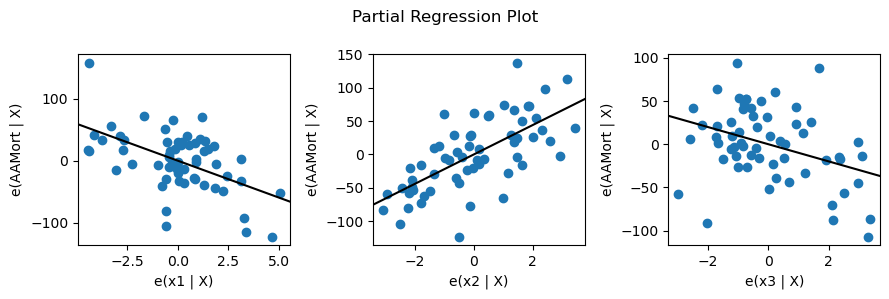

In [26]:
# partial regression plots
fig = plt.figure(figsize = (9, 3))
sm.graphics.plot_partregress_grid(res_pca_3, 
                                  exog_idx = ['x1', 'x2', 'x3'], 
                                  grid = (1, 3), 
                                  fig = fig)
fig.tight_layout()
plt.show()

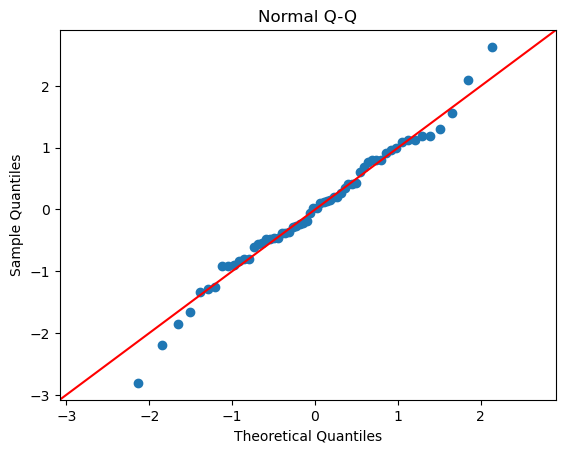

In [27]:
sm.qqplot(env['residuals'], line = '45', fit = True)
plt.title("Normal Q-Q")
plt.show()

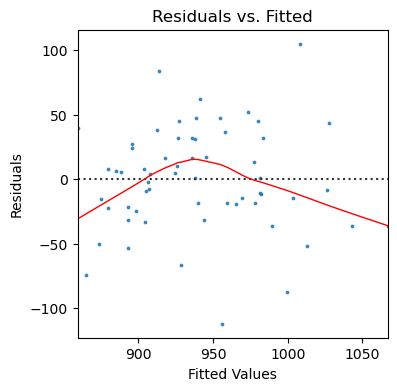

In [28]:
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = env['fittedvalues'], 
              y = env['residuals'],
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

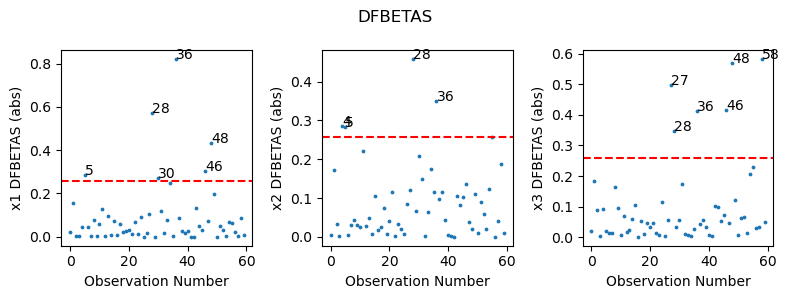

In [29]:
# DFBETAS
X_pca_3_df = pd.DataFrame(X_pca_3)
X_pca_3_df.columns = ['const', 'x1', 'x2', 'x3']

def plot_dfbetas(column, ax, label_level = 2 / np.sqrt(len(env))):
    idx = X_pca_3_df.columns.get_loc(column)
    env['dfbetas_' + column] = res_pca_3.get_influence().dfbetas[:, idx]

    ax.set_ylabel(column + " DFBETAS (abs)")
    ax.set_xlabel("Observation Number")
    ax.scatter(env.index, np.abs(env['dfbetas_' + column]), s = 3)
    ax.axhline(y = label_level, color = 'r', linestyle = 'dashed')

    # optional: label outliers
    outliers = env[np.abs(env['dfbetas_' + column]) > label_level]
    for i in list(outliers.index):
        ax.annotate(str(i), (i, np.abs(env['dfbetas_' + column][i])))

fig, axes = plt.subplots(1, 3, figsize = (8, 3))
plt.suptitle("DFBETAS")
plot_dfbetas("x1", axes[0])
plot_dfbetas("x2", axes[1])
plot_dfbetas("x3", axes[2])
fig.tight_layout()
plt.show()

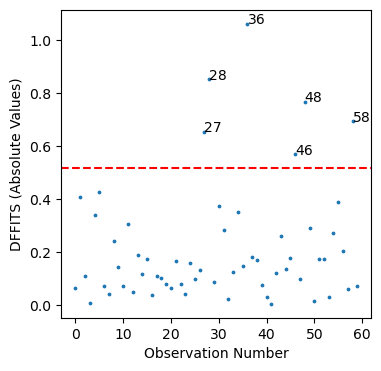

In [30]:
# DFFITS
env['dffits'] = res_pca_3.get_influence().dffits[0]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFFITS (Absolute Values)")
plt.xlabel("Observation Number")
plt.scatter(env.index, np.abs(env['dffits']), s = 3)
plt.axhline(y = 2 * np.sqrt(len(res_pca_3.params) / len(env)), color = 'r', linestyle = 'dashed')

# OPTIONAL: code to grab potential outliers
outliers = env[np.abs(env['dffits']) > 2 * np.sqrt(len(res_pca_3.params) / len(env))]
for i in list(outliers.index):
        plt.annotate(str(i), (i, np.abs(env['dffits'][i])))

plt.show()

In [31]:
# Variance Inflation Factors (VIF)
env_vifs_pca_3 = pd.DataFrame()
env_vifs_pca_3['Feature'] = X_pca_3_df.columns[1:]
env_vifs_pca_3['VIF'] = [vif(X_pca_3_df, i) for i in range(1, len(X_pca_3_df.columns))]

print("Max = ", max(env_vifs_pca_3['VIF']))
print("Mean = ", np.mean(env_vifs_pca_3['VIF']))
env_vifs_pca_3

Max =  1.0
Mean =  1.0


,Feature,VIF
0,x1,1.0
1,x2,1.0
2,x3,1.0


## Summary and Conclusions

For this data set, linear regression with variable selection outperformed the principal component regression model. The traditional linear regression model also has the benefit of being way more interpretable than the PCR model. While PCR did not outperform traditional regression for this data set, it certainly could for other data sets.